<a href="https://colab.research.google.com/github/Sariyakareem/Project_Code_For_Image_Classification/blob/main/Image_Classification_on_Cifar_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
# Importing TensorFlow and Keras libraries for creating and training neural network models
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  # CIFAR-10 dataset for image classification tasks
from tensorflow.keras.models import Sequential  # Allows for the creation of a sequential neural network model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Core layers used in constructing CNNs
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Enables data augmentation for better model generalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input  # Importing the Input layer for defining input shapes
from tensorflow.keras.applications import VGG19  # Import VGG16 model if needed for transfer learning
# Libraries for data visualization and numerical computations
import matplotlib.pyplot as plt  # Used for visualizing training performance and augmented images
import numpy as np  # Useful for performing numerical operations and handling arrays
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Evaluation Metrices for the Model

# Loading the Dataset

In [3]:
# Load CIFAR-10 data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Applying Data Augmentation

In [4]:
# Configure data augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
    zoom_range=0.1  # Randomly zoom into images by up to 10%
)

# Apply data augmentation to the training set
datagen.fit(X_train)


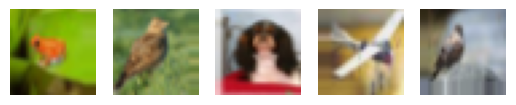

In [5]:
# Display augmented images from the training data
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=5):
    for i in range(5):
        plt.subplot(1, 5, i + 1)  # Create a subplot for each image
        plt.imshow(X_batch[i])  # Display the augmented image
        plt.axis('off')  # Hide the axes for better visualization
    plt.show()  # Render the images
    break  # Display only one batch and stop


# Simple CNN Model

In [6]:
model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Model Compilation Simple Model

In [9]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Traning the Simple Model

In [10]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',                     # Monitor validation loss
        patience=5,                             # Number of epochs with no improvement
        restore_best_weights=True,              # Restore weights of the best epoch
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',                     # Monitor validation loss
        factor=0.5,                             # Reduce learning rate by a factor of 0.5
        patience=3,                             # Patience before reducing learning rate
        min_lr=1e-7,                            # Minimum learning rate
        verbose=1
    )
]

# Train the model using the augmented data generator with callbacks
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Training with augmented data
    epochs=50,                                      # Number of training epochs
    validation_data=(X_test, Y_test),               # Validation on the test set
    callbacks=callbacks                             # Adding callbacks
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.4868 - loss: 1.4295 - val_accuracy: 0.5358 - val_loss: 1.3049 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.5772 - loss: 1.1986 - val_accuracy: 0.5940 - val_loss: 1.1423 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6138 - loss: 1.0871 - val_accuracy: 0.6162 - val_loss: 1.1839 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6383 - loss: 1.0306 - val_accuracy: 0.6739 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6528 - loss: 0.9859 - val_accuracy: 0.6976 - val_loss: 0.8918 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6628 - loss: 0.9564 - val_accuracy: 0.7187 - val_loss: 0.8069 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.6797 - loss: 0.9216

# Training Curves for Simple Model

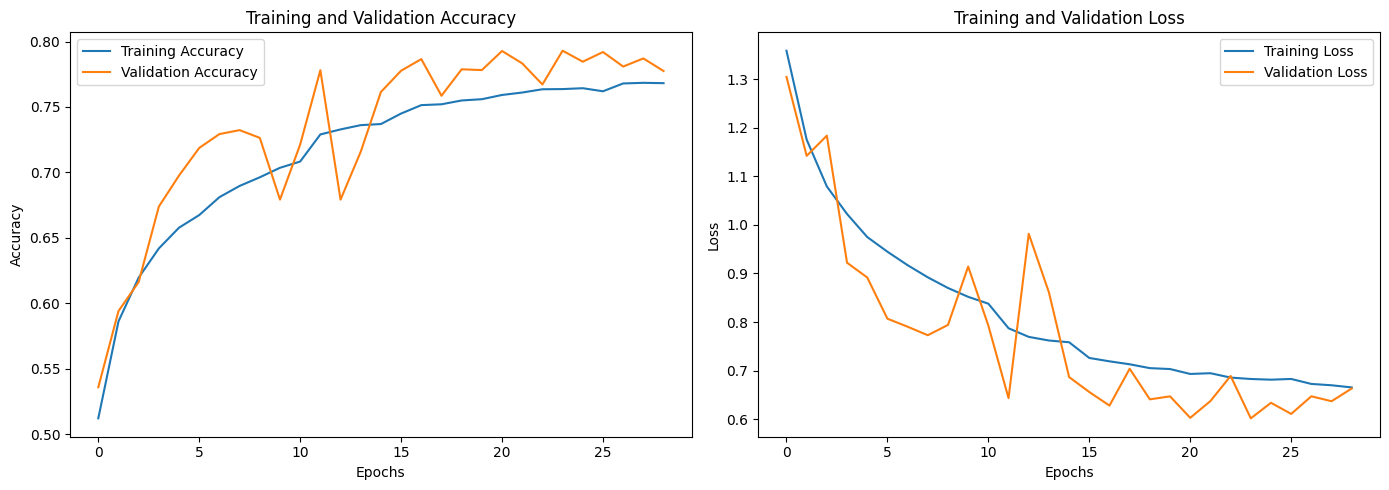

In [11]:
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluating the Simple Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


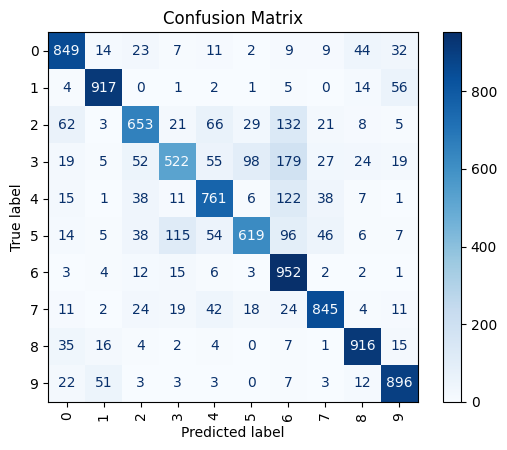

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.90      0.92      0.91      1000
           2       0.77      0.65      0.71      1000
           3       0.73      0.52      0.61      1000
           4       0.76      0.76      0.76      1000
           5       0.80      0.62      0.70      1000
           6       0.62      0.95      0.75      1000
           7       0.85      0.84      0.85      1000
           8       0.88      0.92      0.90      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [12]:
# Assuming model predictions and true labels are available
# Replace Y_test and predictions with actual values
predictions = model.predict(X_test)  # Get model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class labels
true_classes = np.argmax(Y_test, axis=1)  # Convert true labels to class labels

# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

# Defining the Model Structure

In [13]:
# Define the enhanced CNN model architecture with Batch Normalization
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define the input shape

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Normalize activations
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),  # Additional convolutional layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fifth convolutional block (newly added block for more feature extraction)
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Flatten and dense layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Normalize activations
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compiling the Model

In [14]:
# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model with more Layers

In [15]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',                     # Monitor validation loss
        patience=5,                             # Number of epochs with no improvement
        restore_best_weights=True,              # Restore weights of the best epoch
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',                     # Monitor validation loss
        factor=0.5,                             # Reduce learning rate by a factor of 0.5
        patience=3,                             # Patience before reducing learning rate
        min_lr=1e-71,                            # Minimum learning rate
        verbose=1
    )
]

# Train the model using the augmented data generator with callbacks
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Training with augmented data
    epochs=50,                                      # Number of training epochs
    validation_data=(X_test, Y_test),               # Validation on the test set
    callbacks=callbacks                             # Adding callbacks
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.1387 - loss: 6.6750 - val_accuracy: 0.2243 - val_loss: 5.5979 - learning_rate: 1.0000e-04
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.2104 - loss: 5.8624 - val_accuracy: 0.3214 - val_loss: 5.2797 - learning_rate: 1.0000e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.2791 - loss: 5.4409 - val_accuracy: 0.3934 - val_loss: 4.9589 - learning_rate: 1.0000e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.3401 - loss: 5.1248 - val_accuracy: 0.4301 - val_loss: 4.7583 - learning_rate: 1.0000e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3936 - loss: 4.8167 - val_accuracy: 0.4706 - val_loss: 4.4448 - learning_rate: 1.0000e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.4361 - loss: 4.4859 - val_accuracy: 0.4374 - val_loss: 4.6217 - learning_rate: 1.0000e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accurac

# Training Curves for Complex Model

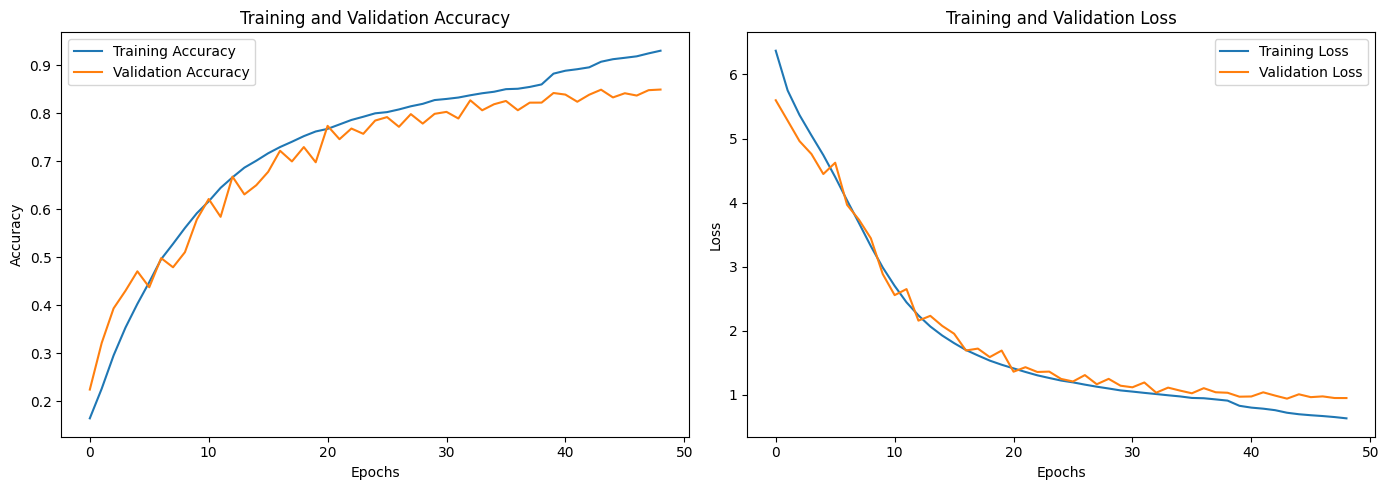

In [16]:
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model Evaluation on the Test Set

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


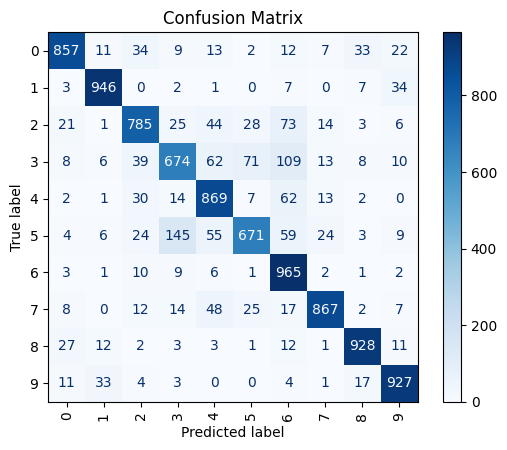

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1000
           1       0.93      0.95      0.94      1000
           2       0.84      0.79      0.81      1000
           3       0.75      0.67      0.71      1000
           4       0.79      0.87      0.83      1000
           5       0.83      0.67      0.74      1000
           6       0.73      0.96      0.83      1000
           7       0.92      0.87      0.89      1000
           8       0.92      0.93      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [17]:
# Assuming model predictions and true labels are available
# Replace Y_test and predictions with actual values
predictions = model.predict(X_test)  # Get model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class labels
true_classes = np.argmax(Y_test, axis=1)  # Convert true labels to class labels

# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

# Applying Transfer Learning Methods

# Applying VGG19

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize CIFAR-10 images to 64x64 (compatible with VGG19)
def resize_images(images, target_size=(64, 64)):
    resized_images = tf.image.resize(images, target_size)
    return resized_images

x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Normalize images to range [0, 1]
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Image Augmentation

In [3]:
# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_resized)

In [4]:
# Load VGG19 with ImageNet weights and freeze initial layers
base_model = VGG19(include_top=False, input_shape=(64, 64, 3), weights='imagenet')

# Freeze layers except the last two
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Add custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.35),
    Dense(256, activation='relu'),
    Dropout(0.30),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])


In [5]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]

# Calculate steps per epoch
steps_per_epoch = len(x_train_resized) // 64
if len(x_train_resized) % 64 != 0:
    steps_per_epoch += 1

# Train the model
history = model.fit(
    datagen.flow(x_train_resized, y_train, batch_size=64),
    epochs=30,
    validation_data=(x_test_resized, y_test),
    callbacks=callbacks
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.6490 - loss: 1.0148 - val_accuracy: 0.7044 - val_loss: 0.8614 - learning_rate: 1.0000e-04
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.6742 - loss: 0.9336 - val_accuracy: 0.7025 - val_loss: 0.8530 - learning_rate: 1.0000e-04
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.7027 - loss: 0.8545 - val_accuracy: 0.7235 - val_loss: 0.7969 - learning_rate: 1.0000e-04
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.7206 - loss: 0.8062 - val_accuracy: 0.7201 - val_loss: 0.7972 - learning_rate: 1.0000e-04
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.7313 - loss: 0.7719 - val_accuracy: 0.7329 - val_loss: 0.7736 - learning_rate: 1.0000e-04
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.7437 - loss: 0.7376 - val_accuracy: 0.7344 - val_loss: 0.7758 - learning_rate: 1.0000e-04
Epoch 7/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10

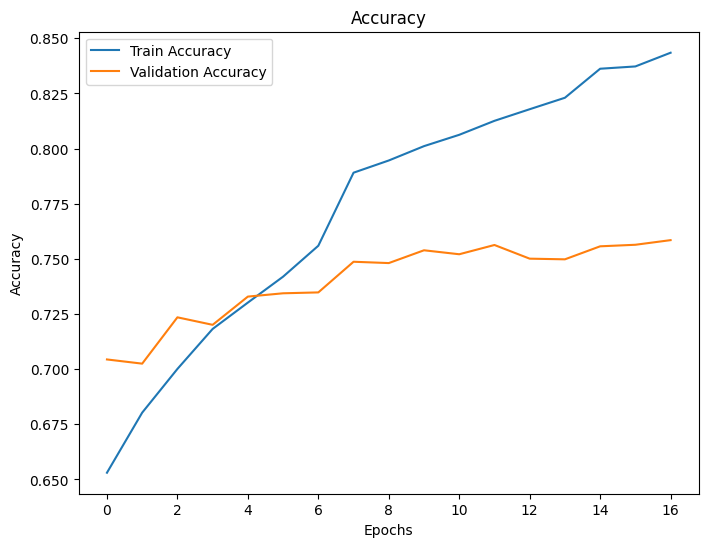

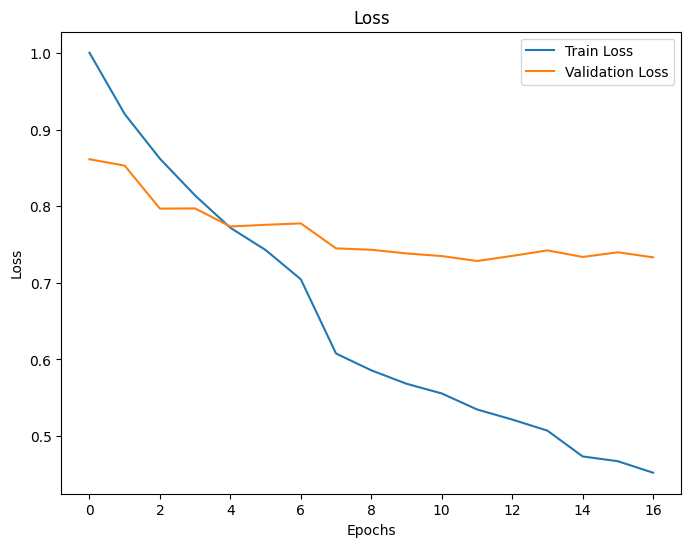

In [9]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


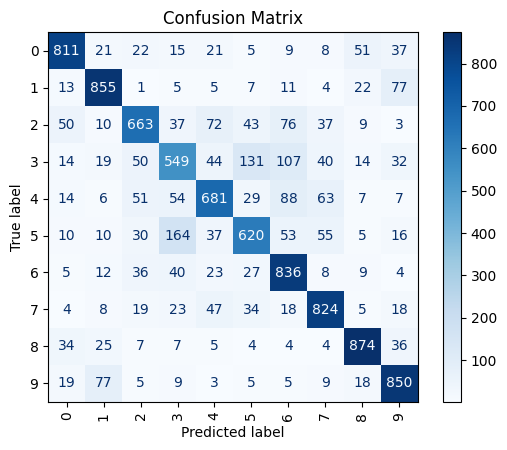

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.82      0.85      0.84      1000
           2       0.75      0.66      0.70      1000
           3       0.61      0.55      0.58      1000
           4       0.73      0.68      0.70      1000
           5       0.69      0.62      0.65      1000
           6       0.69      0.84      0.76      1000
           7       0.78      0.82      0.80      1000
           8       0.86      0.87      0.87      1000
           9       0.79      0.85      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



In [12]:
# Assuming model predictions and true labels are available
# Replace Y_test and predictions with actual values
predictions = model.predict(x_test_resized)  # Get model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class labels
true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)